# Análise de dados de COVID

Oficial Number: https://transparencia.registrocivil.org.br/especial-covid

ImfoGripe: https://gitlab.procc.fiocruz.br/mave/repo/-/tree/master/Dados/InfoGripe


Nem todo mundo que tem SRAG tem COVID
Pode ser por bacteria ou por outra coisa 

Não confundir:
- SARS-COV / SRAG
- Nome / Síndrome que pode ser causada por várias coisas

SRAG = insuficiência respiratória = Síndrome Respiratória Aguda Grave 

SRAG é a evolução grave da doença


In [1]:
import csv
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np

# variável que vou armazenar todos os dados
_complete_dataset = []
filtered_data = []

file_csv = 'Dados_InfoGripe_serie_temporal_com_estimativas_recentes.csv'

In [66]:
# Filtros
data = 'obito'
scale = 'casos'
# years = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
years = ['2016','2017','2018','2019','2020']

# states = ["Acre","Alagoas","Amapá","Amazonas","Bahia","Ceará","Distrito Federal","Espírito Santo","Goiás","Maranhão","Mato Grosso","Mato Grosso do Sul","Minas Gerais","Pará","Paraíba","Paraná","Pernambuco","Piauí","Rio de Janeiro","Rio Grande do Norte","Rio Grande do Sul","Rondônia","Roraima","São Paulo","Santa Catarina","Sergipe","Tocantins"]
states = ["Acre","Alagoas","Amapá","Amazonas","Bahia","Ceará","Distrito Federal","Espírito Santo","Goiás","Maranhão","Mato Grosso","Mato Grosso do Sul","Minas Gerais","Pará","Paraíba","Paraná","Pernambuco","Piauí","Rio de Janeiro","Rio Grande do Norte","Rio Grande do Sul","Rondônia","Roraima","Santa Catarina","Sergipe","Tocantins"]

In [3]:
def lines_counter(array):
    return sum(1 for row in array)


def filter_by_column(index, value, array_src):
    return list(filter(lambda p: str(value) == str(p[index]), array_src))
       

# Filtering phase
def filter_data(dataset, year, scale, state, data):
    filtered = filter_by_column(2, state, dataset)
    filtered = filter_by_column(4, data, filtered)
    filtered = filter_by_column(5, scale, filtered)
    filtered = filter_by_column(6, year, filtered)
    return filtered

In [4]:
# initialize the data
infoGripe_df = pd.read_csv(file_csv, delimiter=';', decimal=',')

# Convert
_complete_dataset = list([[row[col] for col in infoGripe_df.columns] for row in infoGripe_df.to_dict('records')])

In [67]:
dictionary = {}
dictionary_2020 = {}
dictionary_2019 = {}
dictionary_2018 = {}
dictionary_2017 = {}
dictionary_2016 = {}

for state in states:
#     print("\nEstado: "+state)
    total_obitos = 0
    obitos_2018 = 0
    obitos_2019 = 0
    obitos_2020 = 0
    
    for year in years:
        obitos = 0
        filtered_data = filter_data(_complete_dataset, year, scale, state, data)

        for row in filtered_data:
    #         print(row[9])
            if row[9] is not '':
                if not np.isnan(row[9]):
                    obitos = obitos + round(row[9])
                    
        if year == '2016':
            obitos_2016 = obitos
            dictionary_2016[state] = {str(obitos)}
        if year == '2017':
            obitos_2017 = obitos
            dictionary_2017[state] = {str(obitos)}                    
        if year == '2018':
            obitos_2018 = obitos
            dictionary_2018[state] = {str(obitos)}
        if year == '2019':
            obitos_2019 = obitos
            dictionary_2019[state] = {str(obitos)}
        if year == '2020':
            obitos_2020 = obitos
            dictionary_2020[state] = {str(obitos)}            
            
        dictionary[state] = {str(obitos_2019), str(obitos_2020)}
                    
        if len(filtered_data) == 0:
            print("Erro em alguma informação.")
#         else:
#             print('\nAno: '+str(filtered_data[0][6]))
#             print(filtered_data[0][5]+' : '+str(obitos))

#             total_obitos = total_obitos + obitos
#     print('\nTotal de casos desde 2009: '+str(total_obitos))
    
# print(dictionary)
# print(dictionary_2018)
# print(dictionary_2019)
# print(dictionary_2020)

# Visualizing 2020s data

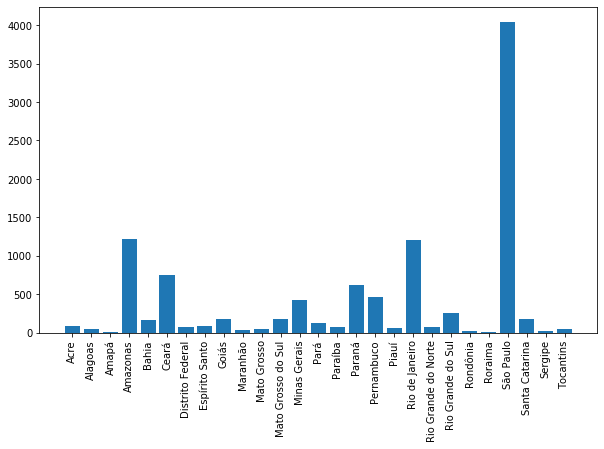

In [41]:
xs, ys=zip(*((int(x), k) for k in dictionary for x in dictionary[k]))

plt.rcParams['figure.figsize'] = (10,6)

plt.bar(ys, xs)
plt.xticks(rotation=90)
plt.show()

# Comparação entre os ultimos anos

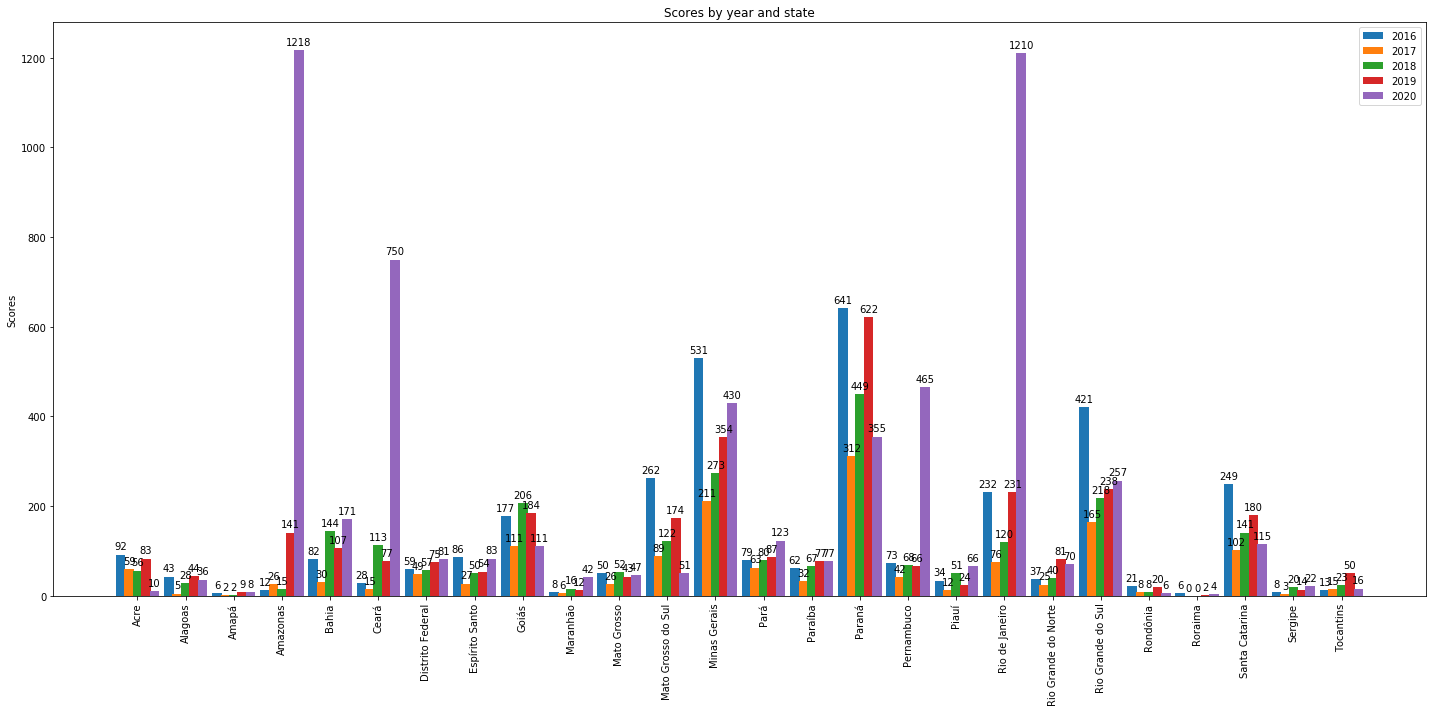

In [76]:
xs2020, ys2020=zip(*((int(x), k) for k in dictionary_2020 for x in dictionary_2020[k]))
xs2019, ys2019=zip(*((int(x), k) for k in dictionary_2019 for x in dictionary_2019[k]))
xs2018, ys2018=zip(*((int(x), k) for k in dictionary_2018 for x in dictionary_2018[k]))
xs2017, ys2017=zip(*((int(x), k) for k in dictionary_2017 for x in dictionary_2017[k]))
xs2016, ys2016=zip(*((int(x), k) for k in dictionary_2016 for x in dictionary_2016[k]))

plt.rcParams['figure.figsize'] = (20,10)

x = np.arange(len(ys2019))
width = 0.35  # the width of the bars
separator = 0.2

fig, ax = plt.subplots()
rects = []
rects.append(ax.bar(x - width, xs2016, separator, label='2016'))
rects.append(ax.bar(x - width/2, xs2017, separator, label='2017'))
rects.append(ax.bar(x , xs2018, separator, label='2018'))
rects.append(ax.bar(x + width/2, xs2019, separator, label='2019'))
rects.append(ax.bar(x + width, xs2020, separator, label='2020'))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by year and state')
ax.set_xticks(x)
ax.set_xticklabels(ys2019)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

for rect in rects:
    autolabel(rect)

fig.tight_layout()

plt.show()

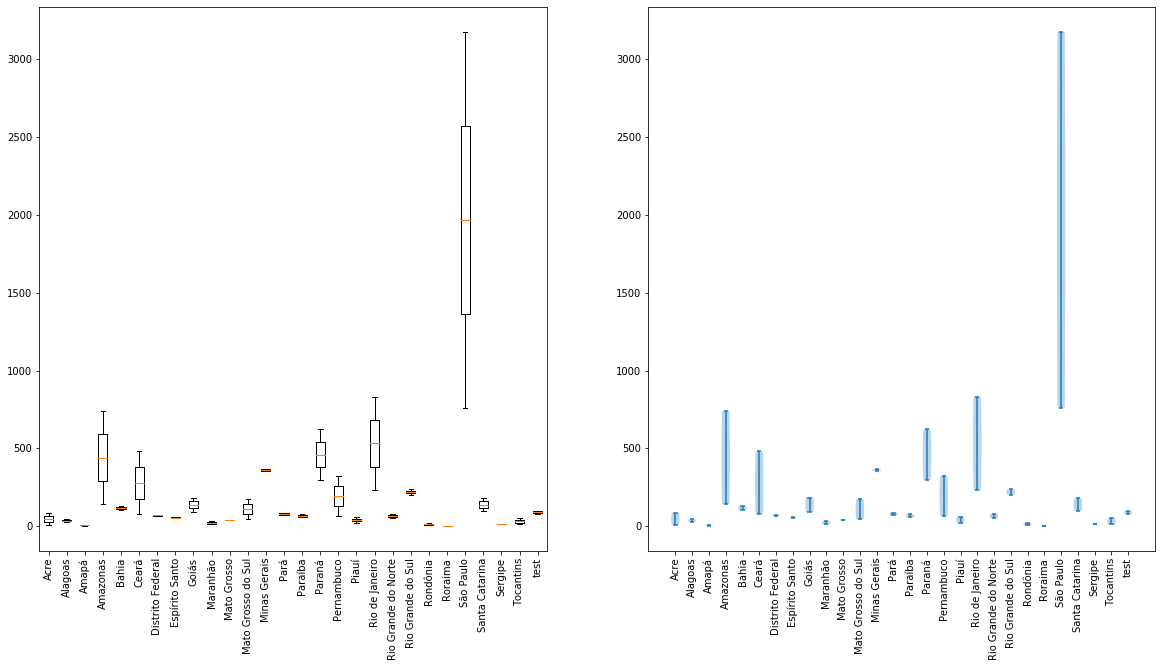

In [80]:
index= []
data = []
for i, (key, val) in enumerate(dictionary.items()):
    index.append(key)
    data.append(list(map(float, val)))

fig, (ax, ax2) = plt.subplots(ncols=2)

plt.rcParams['figure.figsize'] = (20,10)

ax.boxplot(data)
ax.set_xticklabels(index)

ax2.violinplot(data)
ax2.set_xticks(range(1,len(index)+1))
ax2.set_xticklabels(index) 

for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)
    
plt.show()